In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
np.sort(df.region.unique())

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [8]:
from sklearn import preprocessing, model_selection, linear_model,metrics

In [9]:
target = "charges"
X = df.drop(columns=[target]) # Features
y = df[target] # Label/outcome/target

# One hot Encoding - converts the categorical data into numeric
X = pd.get_dummies(X, drop_first=True)
features = X.columns

# X.values returns numpy array for the dataframe
# astype converts each feature to floating point number
X = X.values.astype("float")

# Divide the dataset into training and test
# Model is trained on training set 
# Model is evaluated on the test set
# Model has not seen the test data and assuming test records is a good 
# representation of future, we can get an idea how the model will perform
# in production
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1234)

print("training shape", X_train.shape, "test shape:", X_test.shape)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # calculates x_mean and x_std for each column
# computes z score for each column
X_train_std = scaler.transform(X_train) 
# We see that mean for each column is 0 and std = 1 (approax)
pd.DataFrame(X_train_std).describe()

# Do not call scaler.fit on X_test data because 
# we want to do the transformation as done on training
X_test_std = scaler.transform(X_test)

lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train) 
# training is happening to build the model
# Essetially, the coefficients/weights/parameters values are calculated

# Doing the prediction
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

test_residual = (y_test_pred - y_test) 

mse_test = np.mean(test_residual ** 2)
mse_test


print("mse for test: "
      , metrics.mean_squared_error(y_test, y_test_pred))
print("mse for train: "
      , metrics.mean_squared_error(y_train, y_train_pred))

training shape (936, 8) test shape: (402, 8)
mse for test:  37250298.43800378
mse for train:  36502931.873650074


In [10]:
y_baseline = np.mean(y_train)
sse = np.sum((y_train_pred - y_train) ** 2)
sst = np.sum((y_baseline - y_train) ** 2)
sse/sst

# this above ratio is always >0 because both numerator 
# and denominator are positive
# Expected value is < 1 because ML model should do 
# a better job that mere baseline

# is it possible to have this value > 1?
# if the model is random, then SSE could be greater than SST 
# what is minimum value for sse/sst? [answer 0, when model is perfect]

r2 = 1 - sse/sst
# expected value of r2 < 1, closer to 1, better is the model
# is r2 is negative, then the model is not useful
r2

0.7544299324882598

In [11]:
936/len(X)

0.6995515695067265

In [12]:
np.random.seed(1)
np.random.random(5)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [13]:
pd.DataFrame({"feature": features, "coefficient": lr.coef_})

,feature,coefficient
0,age,3487.308811
1,bmi,1904.491635
2,children,511.667655
3,gender_male,-252.292793
4,smoker_yes,9845.219666
5,region_northwest,-319.619948
6,region_southeast,-474.410964
7,region_southwest,-387.243823


In [14]:
lr.intercept_

13340.822097947648

In [15]:
from sklearn import pipeline

In [47]:
target = "charges"
X = df.drop(columns=[target]) # Features
X["high_bmi"] = np.where(X.bmi > 30, 1, 0)
X["age_group"] = np.where(X.age > 60, "senior", "normal")

y = df[target] # Label/outcome/target

# Log transformation to reduce the impact of the outliers on y values
y = np.log(y) 
# One hot Encoding - converts the categorical data into numeric
X = pd.get_dummies(X, drop_first=True)
features = X.columns

# X.values returns numpy array for the dataframe
# astype converts each feature to floating point number
X = X.values.astype("float")

# Divide the dataset into training and test
# Model is trained on training set 
# Model is evaluated on the test set
# Model has not seen the test data and assuming test records is a good 
# representation of future, we can get an idea how the model will perform
# in production
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1234)



pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                                              , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train) 
# training is happening to build the model
# Essetially, the coefficients/weights/parameters values are calculated

# Doing the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("mse for test: "
      , metrics.mean_squared_error(y_test, y_test_pred))
print("mse for train: "
      , metrics.mean_squared_error(y_train, y_train_pred))
print("r2 for test: "
      , metrics.r2_score(y_test, y_test_pred))
print("r2 for train: "
      , metrics.r2_score(y_train, y_train_pred))

mse for test:  0.12108940564106802
mse for train:  0.1348105820682567
r2 for test:  0.8577207796852981
r2 for train:  0.839917679953181


In [34]:
scaler.scale_, scaler.mean_

(array([14.03541605,  5.96571422,  1.2158758 ,  0.49998174,  0.39903524,
         0.43051711,  0.44629868,  0.42268284]),
 array([39.10149573, 30.93820513,  1.10470085,  0.5042735 ,  0.19871795,
         0.2457265 ,  0.27457265,  0.23290598]))

In [31]:
for sheet in sheets:
    print(len(sheet))

9568
9568
9568
9568
9568


In [37]:
a = np.array([
    [1, 1, 1],
    [-1, 0, 1],
    [1, 2, 3],
    [3, 2, 1]
])
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(a)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  0.,  1.,  1., -0., -1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 3.,  2.,  1.,  9.,  6.,  3.,  4.,  2.,  1.]])

In [39]:
est = pipe.steps[-1][-1]
est.coef_

array([-1.80813754e+03, -1.68805345e+03,  1.70196263e+03,  9.68638939e+15,
       -2.61493201e+15,  7.49042765e+15,  1.68836035e+16, -1.14797158e+16,
       -9.76239836e+15,  1.31156602e+16,  4.07600000e+03,  8.21500000e+02,
       -4.85718750e+02, -4.48000000e+02,  4.19000000e+02,  6.36000000e+02,
        7.77000000e+02,  1.78200000e+03,  1.32900000e+03, -1.57810000e+04,
        3.35000000e+03,  6.58000000e+02, -2.92275000e+03, -3.74562500e+02,
        7.39275000e+03, -1.98025000e+03, -7.16512500e+03, -2.18525000e+03,
       -2.92650000e+03, -7.67500000e+01, -9.75000000e+01, -1.93000000e+02,
       -4.74000000e+02, -3.80500000e+02, -7.47000000e+02, -8.89000000e+02,
        3.79500000e+02, -9.68638939e+15,  2.91500000e+02,  4.63375000e+03,
        2.17000000e+02,  1.26300000e+03, -8.40000000e+01,  3.65250000e+02,
        2.61493201e+15, -6.30000000e+01,  1.70000000e+02,  4.10000000e+02,
        4.49500000e+02,  1.41500000e+02, -7.49042765e+15, -3.50000000e+01,
       -6.20000000e+01,  

In [49]:
import matplotlib.pyplot as plt

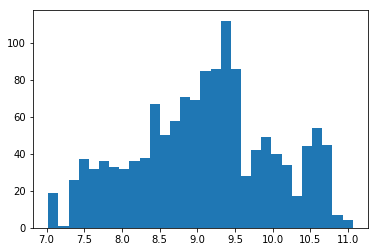

In [50]:
plt.hist(y, bins = 30);